In [1]:
import pandas as pd
import sys
sys.path.append('../scripts')
from plots import plot_histogram

In [2]:
data = pd.read_csv('../data/complaints.csv')

KeyboardInterrupt: 

In [ ]:
data.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,narrative_word_count
76,2025-03-06,Credit reporting or other personal consumer re...,Credit reporting,Problem with fraud alerts or security freezes,NaN,XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX Apt XX...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,75211,NaN,Consent provided,Web,2025-03-06,Closed with explanation,Yes,NaN,12351447,317
359,2025-02-26,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information is missing that should be on the r...,Subject : Dispute of Unauthorized Hard Inquiri...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,FL,331XX,NaN,Consent provided,Web,2025-02-26,Closed with explanation,Yes,NaN,12203565,447
11499,2025-06-15,Mortgage,Conventional home mortgage,Applying for a mortgage or refinancing an exis...,Changes in loan terms during the application p...,I signed a purchase agreement with Lennar Corp...,Company has responded to the consumer and the ...,"Lennar Financial Services, LLC",IL,60538,NaN,Consent provided,Web,2025-06-15,Closed with explanation,Yes,NaN,14089944,273
11973,2025-06-14,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,"After checking my report, I found numerous acc...",Company has responded to the consumer and the ...,"Fidelity National Information Services, Inc. (...",FL,32303,NaN,Consent provided,Web,2025-06-14,Closed with explanation,Yes,NaN,14080390,112
12237,2025-06-13,Credit card,Store credit card,Getting a credit card,Card opened without my consent or knowledge,A XXXX XXXX card was opened under my name by a...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",TX,78230,Servicemember,Consent provided,Web,2025-06-13,Closed with non-monetary relief,Yes,NaN,14069121,91


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9609797 entries, 0 to 9609796
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 1.3+

In [9]:
data.describe(include='all')

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
count,9609797,9609797,9374502,9609791,8770275,2980756,4839590,9609797,9555281,9579569,628768,7960236,9609797,9609797,9609777,9609797,768299,9.609797e+06
unique,4952,21,86,178,272,2108758,11,7674,63,34965,3,4,7,4901,8,2,2,NaN
top,2025-01-17,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,In accordance with the Fair Credit Reporting a...,Company has responded to the consumer and the ...,"EQUIFAX, INC.",FL,XXXXX,Servicemember,Consent not provided,Web,2025-02-25,Closed with explanation,Yes,No,NaN
freq,34093,4834855,6955847,3613761,2324057,21622,4537468,2321626,1273171,172807,391563,4639279,9017914,32525,5487712,9535859,619921,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.092744e+06
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.774842e+06
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.038016e+06
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.448508e+06
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.129591e+07


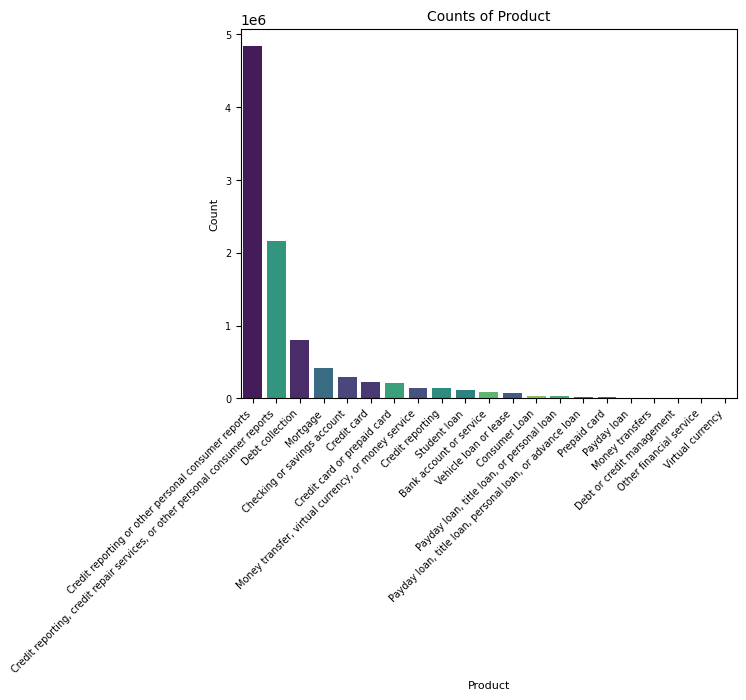

In [4]:
plot_histogram(data,['Product'])

In [5]:
# First, handle potential missing narratives by filling them with an empty string
# This prevents errors when calculating word count
data['Consumer complaint narrative'] = data['Consumer complaint narrative'].fillna('')
data['narrative_word_count'] = data['Consumer complaint narrative'].apply(lambda x: len(str(x).split()))

In [ ]:
plot_histogram(data,['narrative_word_count'])

In [1]:
complaints_with_narratives = data[data['Consumer complaint narrative'].str.strip() != ''].shape[0]
complaints_without_narratives = data[data['Consumer complaint narrative'].str.strip() == ''].shape[0]

print(f"Number of complaints with narratives: {complaints_with_narratives}")
print(f"Number of complaints without narratives: {complaints_without_narratives}")
print(f"Total complaints: {data.shape[0]}")

NameError: name 'data' is not defined